* [Link documentação da gradio] {https://gradio.app/sharing-your-app/#api-page}

# **Importação de bibliotecas e dataset**

In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CCF-726/Projeto-Final/stroke_data.csv")
data

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
40905,1.0,38.0,0,0,0,4,1,120.94,29.7,1,0
40906,0.0,53.0,0,0,1,4,0,77.66,40.8,0,0
40907,1.0,32.0,0,0,1,2,0,231.95,33.2,0,0
40908,1.0,42.0,0,0,1,3,0,216.38,34.5,0,0


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40849 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40849 non-null  float64
 1   age                40849 non-null  float64
 2   hypertension       40849 non-null  int64  
 3   heart_disease      40849 non-null  int64  
 4   ever_married       40849 non-null  int64  
 5   work_type          40849 non-null  int64  
 6   Residence_type     40849 non-null  int64  
 7   avg_glucose_level  40849 non-null  float64
 8   bmi                40849 non-null  float64
 9   smoking_status     40849 non-null  int64  
 10  stroke             40849 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.7 MB


In [67]:
data.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40849.000000,40849.000000,40849.000000,40849.000000,40849.000000,40849.000000,40849.000000,40849.000000,40849.000000,40849.000000,40849.000000
mean,0.554897,51.404074,0.213592,0.127690,0.821293,3.460942,0.514774,122.070963,30.405795,0.488702,0.499449
std,0.496983,21.543166,0.409847,0.333748,0.383111,0.781067,0.499788,57.555158,6.835516,0.499878,0.500006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.950000,29.400000,0.000000,0.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.410000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


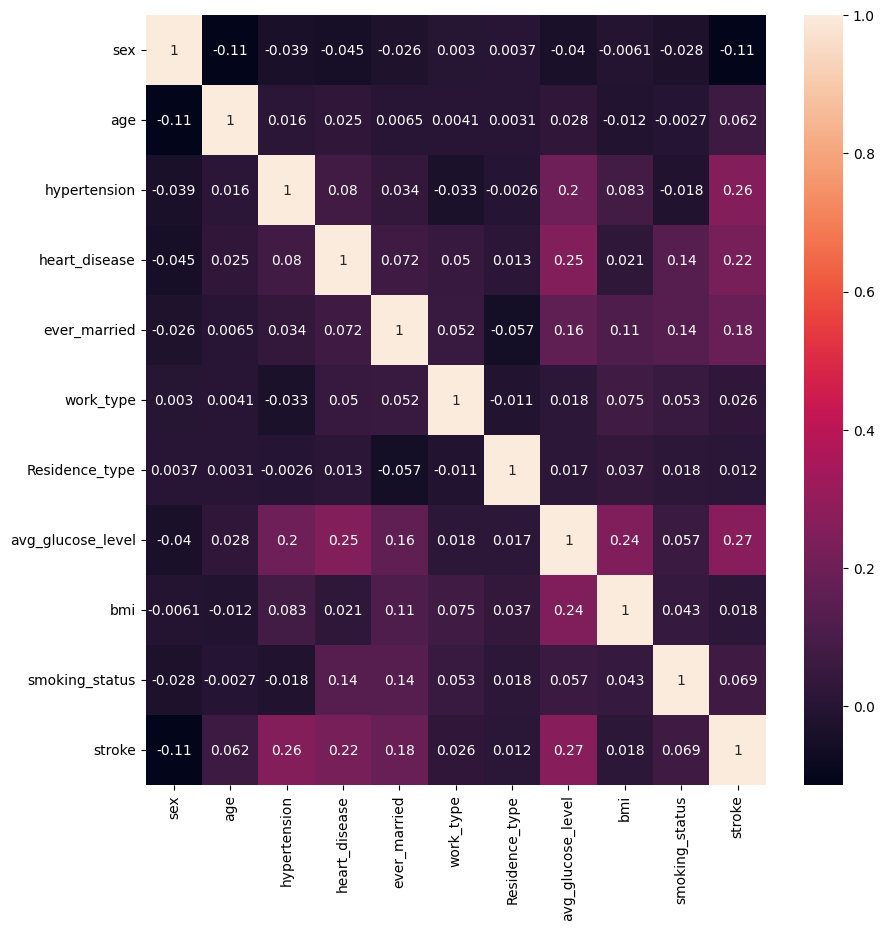

In [77]:
import seaborn as sns
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(data.corr(), annot = True);

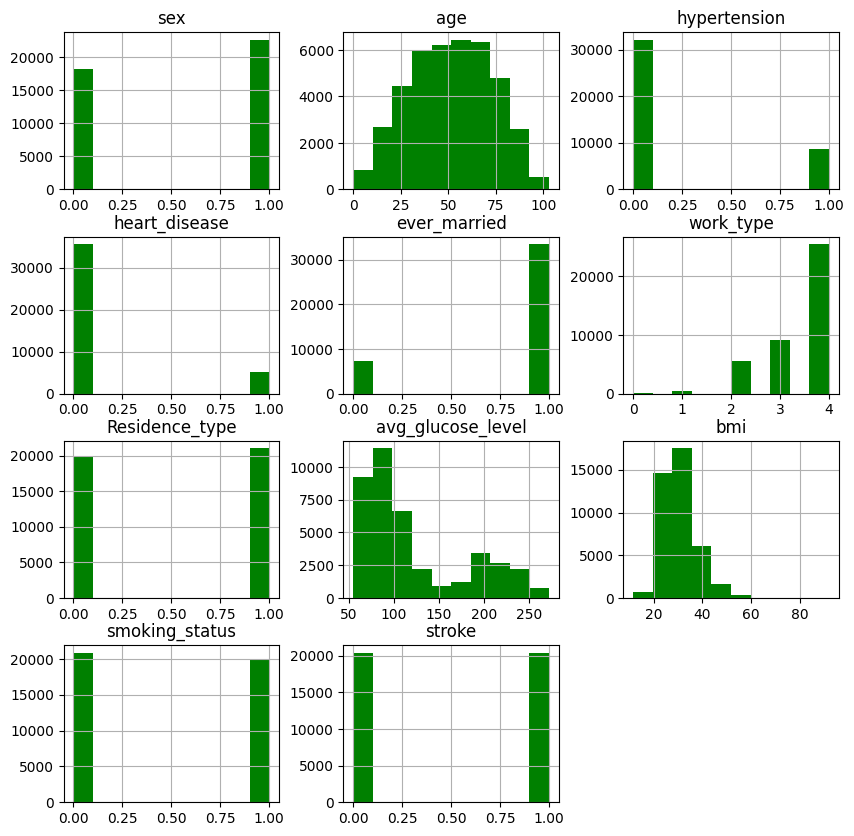

In [80]:
data.hist(bins = 10, figsize = (10,10), color = 'g');

#**Analisando o banco de dados**

In [81]:
#@title Selecionando os indices problemáticos da coluna 'age'

indexesProblematicos = data[data.age < 0].index

indexesProblematicos

Int64Index([], dtype='int64')

In [82]:
#@title Remove linha completa de 'age' menor que zero(0).
data.drop(indexesProblematicos, inplace=True)

<ipython-input-82-1eeeac63657a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(indexesProblematicos, inplace=True)


In [83]:
age = data['age'].value_counts()
age


53.0     668
49.0     660
60.0     657
50.0     657
56.0     655
        ... 
0.0       23
100.0     14
102.0      7
101.0      6
103.0      1
Name: age, Length: 104, dtype: int64

## Verificação dos Dados

Apesar dos dados serem limpos, aumentados e com classes balanceadas. O atributo 'sex' possue 3 amostras com 'NaN'. Por se tratar de poucas amostras, a decisão foi de removê-las do banco de dados e assim manter os dados autenticos.

In [84]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40849 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40849 non-null  float64
 1   age                40849 non-null  float64
 2   hypertension       40849 non-null  int64  
 3   heart_disease      40849 non-null  int64  
 4   ever_married       40849 non-null  int64  
 5   work_type          40849 non-null  int64  
 6   Residence_type     40849 non-null  int64  
 7   avg_glucose_level  40849 non-null  float64
 8   bmi                40849 non-null  float64
 9   smoking_status     40849 non-null  int64  
 10  stroke             40849 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.7 MB


In [85]:
data['sex'].isnull().sum()


0

In [86]:

#@title Remove as linhas que contém elementos 'NaN'.
data = data.dropna()
data.shape

(40849, 11)

# **Divisão do dataset**

In [87]:
#Remove a coluna "stroke"
y = data["stroke"].values
X = data.drop("stroke", axis=1).values
X

array([[  1.  ,  63.  ,   0.  , ..., 228.69,  36.6 ,   1.  ],
       [  1.  ,  42.  ,   0.  , ..., 105.92,  32.5 ,   0.  ],
       [  0.  ,  61.  ,   0.  , ..., 171.23,  34.4 ,   1.  ],
       ...,
       [  1.  ,  32.  ,   0.  , ..., 231.95,  33.2 ,   0.  ],
       [  1.  ,  42.  ,   0.  , ..., 216.38,  34.5 ,   0.  ],
       [  1.  ,  35.  ,   0.  , ...,  95.01,  28.  ,   0.  ]])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2020)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32679, 10), (8170, 10), (32679,), (8170,))

# **Análise de Correlação**

Análise de Correlação
* Coefciente de Pearson: mede o grau de correlação através do cálculo de direção positiva ou negativa.


O coeficiente de Pearson, também chamado de “coeficiente de correlação produto-momento” ou chamado de “*p* de Pearson”, mede o grau de correlação através do cálculo de direção positiva ou negativa. Este coeficiente, normalmente representado por *ρ* assume apenas valores entre **-1 e 1**.



*   **Correlação positiva:** quando duas variáveis que possuem correlação crescem ou decrescem juntas, ou seja, que possuem uma relação direta;
*   **Correlação negativa:** quando duas variáveis que possuem correlação mas quando uma variável cresce a outra decresce, ou vice-versa;
*   **Não ter correlação:** quando o crescimento ou decrescimento de uma variável não tem efeito sobre outra variável.


Como podemos interpretar os valores que ρ pode assumir?

* ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
* ρ = 0,7 a 09 (positivo ou negativo): correlação forte;
* ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
* ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
* ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

In [ ]:
#@title Análise de Correlação só funcionou no computador local.
import numpy as np
import pandas as pd

correlation = X.corr(method='pearson')

# plot da matriz de correlação
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot


# **PCA**

In [93]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [94]:
pca = PCA(n_components = 2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


X_train_pca.shape, X_test_pca.shape, y_train.shape, y_test.shape

((32679, 2), (8170, 2), (32679,), (8170,))

O **fit** aprende algumas quantidades dos dados, principalmente os componentes e a variância explicada:

In [95]:
print(pca.components_)

[[-2.82624489e-04  1.20465558e-02  1.44050313e-03  1.44556852e-03
   1.07596366e-03  2.58526877e-04  1.51204613e-04  9.99492869e-01
   2.93794785e-02  4.88495181e-04]
 [ 2.62976814e-03 -9.99900228e-01 -1.46019515e-04 -3.13306614e-04
  -2.15271837e-05 -9.08957701e-05 -3.29995339e-05  1.18403265e-02
   7.23025783e-03  1.41111890e-04]]


In [96]:
print(pca.explained_variance_)

[3297.11876036  463.89397053]


# **Modelos**

In [97]:
#@title Árvore de decisão
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.838922888616891

In [99]:
#@title Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.997796817625459

In [ ]:
!pip install xgboost

In [101]:
#@title XGBoost

import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

print(type(xgb_cl))

<class 'xgboost.sklearn.XGBClassifier'>


In [102]:
from sklearn.metrics import accuracy_score

xgb_cl = xgb.XGBClassifier()

xgb_cl.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [103]:
#@title Cross Validation
from sklearn import tree

val_scores = cross_val_score(xgb_cl, X_train, y_train, cv=5, scoring='accuracy')
print('Acurácia nos k-folds:', val_scores)
print('Média: {:.2} | Desvio: {:.2}'.format(np.mean(val_scores), np.std(val_scores)))

Acurácia nos k-folds: [0.999388   0.99709302 0.99739902 0.99724602 0.99693956]
Média: 1.0 | Desvio: 0.0009


In [ ]:
preds = xgb_cl.predict(X_test)
accuracy_score(y_test, preds)

In [32]:
#@title XGBoost com GridSearchCV

param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [33]:
from sklearn.model_selection import GridSearchCV

xgb_cl = xgb.XGBClassifier(objective="binary:logistic")
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")


_ = grid_cv.fit(X_train, y_train)

In [34]:
grid_cv.best_score_

0.9977955776817052

In [35]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 7,
 'reg_lambda': 0,
 'scale_pos_weight': 3,
 'subsample': 0.8}

In [36]:
from sklearn.metrics import roc_auc_score

_ = grid_cv.fit(X_train, y_train)

preds = grid_cv.predict(X_test)

In [37]:
accuracy_score(y_test, preds)

0.924969400244798

In [105]:
#@title Cross Validation
from sklearn import tree

model = tree.DecisionTreeClassifier()

val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print('Acurácia nos k-folds:', val_scores)
print('Média: {:.2} | Desvio: {:.2}'.format(np.mean(val_scores), np.std(val_scores)))

Acurácia nos k-folds: [0.999541   0.999388   0.99877601 0.999694   0.99938791]
Média: 1.0 | Desvio: 0.00031


In [106]:
#@title Melhor resultado com PCA -XGBoost
from sklearn.metrics import accuracy_score

xgb_cl = xgb.XGBClassifier()

xgb_cl.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [107]:
preds = xgb_cl.predict(X_test_pca)
accuracy_score(y_test, preds)

0.7538555691554467

#**Salvando o modelo**

In [38]:
import joblib
import os

xgb_cl.fit(X, y)
joblib.dump(xgb_cl, "model.pkl")

['model.pkl']